# Specific surface area determination

## BET surface area

Let's do a calculation of the BET surface area for these samples. First, make sure the data is imported by running the previous notebook.

In [1]:
%run import.ipynb

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


We use the `area_BET` function, and we first want to look at how the framework attempts to calculate the good BET region on its own. For this we pass the `verbose` parameter and then use matplotlib to display the graph.

MCM-41
BET surface area: a = 360 m2/g
Minimum pressure point chosen is 0.034 and maximum is 0.256
The slope of the BET fit: s = 268.434
The intercept of the BET fit: i = 2.264
The BET constant is: C = 119
Amount for a monolayer: n = 0.00369 mol/g


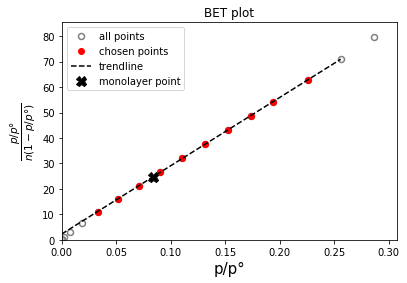

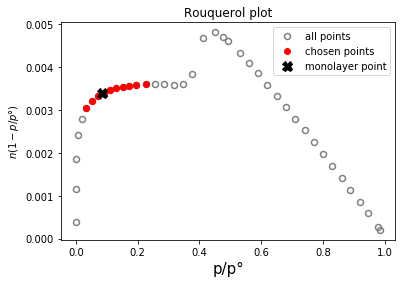

In [2]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='MCM-41')
print(isotherm.material)
pygaps.area_BET(isotherm, verbose=True)
plt.show()

It looks that the correlation is reasonably good. A warning is emmited if this is not the case. We can also restrict the pressure range manually to see what difference it would make.

BET surface area: a = 362 m2/g
Minimum pressure point chosen is 0.051 and maximum is 0.194
The slope of the BET fit: s = 267.285
The intercept of the BET fit: i = 2.423
The BET constant is: C = 111
Amount for a monolayer: n = 0.00371 mol/g


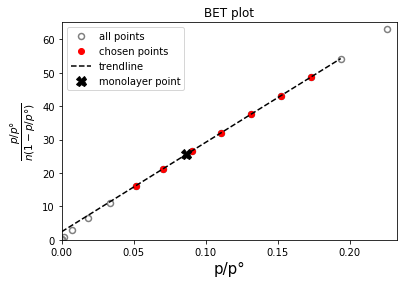

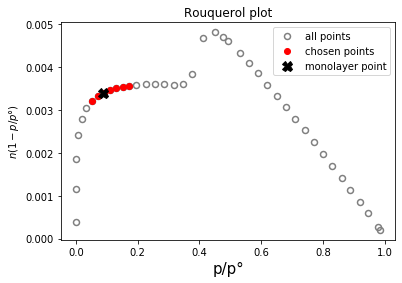

In [3]:
pygaps.area_BET(isotherm, limits=(0.05, 0.2), verbose=True)
plt.show()

Now let's do the analysis on all of the nitrogen samples. Instead of sequential calculations, we'll assume the framework makes a reasonably accurate choice. The function returns a dictionary with all the calculated parameters, so we'll just select the BET area from there.

In [4]:
results = []
for isotherm in isotherms_n2_77k:
    results.append((isotherm.material, pygaps.area_BET(isotherm)))
    
[(x, y['area']) for (x,y) in results]

[('MCM-41', 360.3974748777615),
 ('NaY', 700.9553926474382),
 ('SiO2', 214.47592039312602),
 ('Takeda 5A', 1110.6355133757006),
 ('UiO-66(Zr)', 1277.0119330505152)]

We also have isotherms which were measured with $CO_2$ at room temperature. While there's no guarantee that the BET method is still applicable with this adsorbate and temperature, the framework can still attempt to perform the calculations.

It just happens that the carbon sample is the same in both isotherms. Let's see how the $CO_2$ BET surface area looks.

Takeda 5A
BET surface area: a = 782 m2/g
Minimum pressure point chosen is 0.027 and maximum is 0.253
The slope of the BET fit: s = 125.958
The intercept of the BET fit: i = 5.04
The BET constant is: C = 26
Amount for a monolayer: n = 0.00763 mol/g


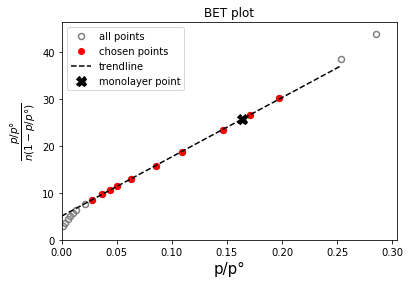

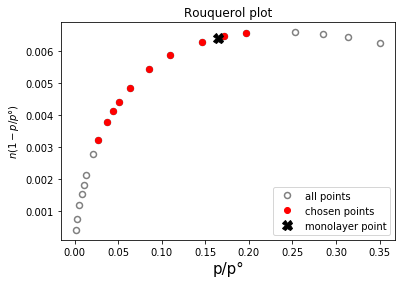

In [5]:
isotherm = next(i for i in isotherms_calorimetry if i.material=='Takeda 5A')
print(isotherm.material)
pygaps.area_BET(isotherm, verbose=True)
plt.show()

The surface area obtained with carbon dioxide is around 780 $m^2$. Compared to the nitrogen surface area of 1100 $m^2$, it is much smaller. While the checks implemented did not find anything wrong, this is likely due to interactions between carbon dioxide and the carbon surface leading to the breakdown of the BET theory.

While any kind of adsorbate and temperature can be analysed through the framework, result interpretation is left at the discretion of the user.
More info can be found in the [documentation of the
module](https://pygaps.readthedocs.io/en/latest/reference/characterisation.html#module-pygaps.characterisation.area_bet).

## Langmuir surface area

Another common method of calculating specific surface area relies on fitting the isotherm with a Langmuir model. This model assumes adsorption is confined to a single layer. We use the `area_langmuir` function, and we first want to see the range selected by the standard method. For this we pass the `verbose` parameter and then use matplotlib to display the graph.

MCM-41
Langmuir surface area: a = 1409 m²/g
Minimum pressure point chosen is 0.051 and maximum is 0.888
The slope of the Langmuir line: s = 69.221
The intercept of the Langmuir line: i = 25.424
The Langmuir constant is: K = 2
Amount for a monolayer: n = 0.01445 mol/g


/mnt/c/users/pauli/Git/pyGAPS/src/pygaps/characterisation/area_langmuir.py:222: UserWarning: The correlation is not linear.
  warnings.warn("The correlation is not linear.")


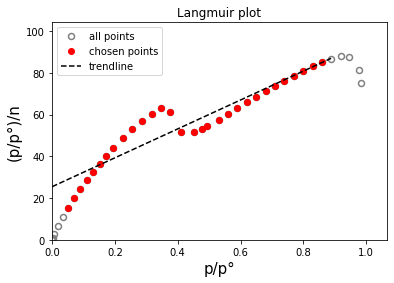

In [6]:
isotherm = next(i for i in isotherms_n2_77k if i.material=='MCM-41')
print(isotherm.material)
pygaps.area_langmuir(isotherm, verbose=True)
plt.show()

The correlation is not very good due to the mesopore condensation which is not predicted by the Langmuir model. Due to this, the area calculated is not realistic. We can select the a range in the monolayer adsorption regime for a better fit.

MCM-41
Langmuir surface area: a = 528 m²/g
Minimum pressure point chosen is 0.051 and maximum is 0.286
The slope of the Langmuir line: s = 184.623
The intercept of the Langmuir line: i = 7.389
The Langmuir constant is: K = 24
Amount for a monolayer: n = 0.00542 mol/g


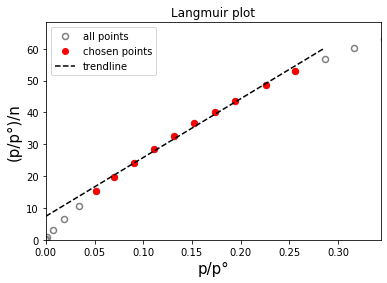

In [7]:
print(isotherm.material)
pygaps.area_langmuir(isotherm, limits=(0.05, 0.3), verbose=True)
plt.show()

The fit is now better and the calculated area is also realistic. Comparing it to the BET area obtained previously, we see that it is higher by about 150 m2. Since adsoprtion is happening in multiple layers rather than a monolayer, it is likely that the value for complete coverage overshoots the actual value. In general the Langmuir surface area is not as widely applicable as the BET one.

Now let's do the analysis on all of the nitrogen samples and compare the obtained surface areas with the BET ones.

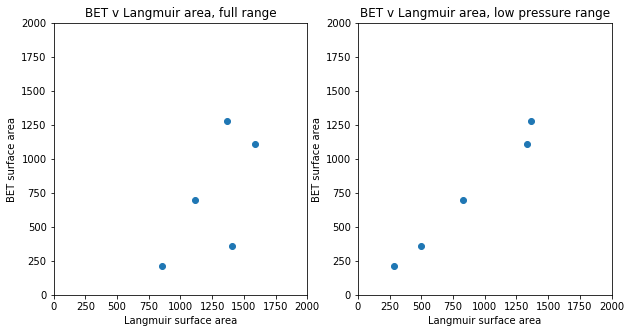

In [8]:
area_langmuir = []
area_langmuir_lim = []
area_bet = []
for isotherm in isotherms_n2_77k:
    area_bet.append(pygaps.area_BET(isotherm)['area'])
    area_langmuir.append(pygaps.area_langmuir(isotherm)['area'])
    area_langmuir_lim.append(pygaps.area_langmuir(isotherm, limits=(0.01, 0.3))['area'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.scatter(area_langmuir, area_bet)
ax2.scatter(area_langmuir_lim, area_bet)

ax1.set_title('BET v Langmuir area, full range')
ax2.set_title('BET v Langmuir area, low pressure range')

ax1.set_xlim(left=0, right=2000)
ax1.set_ylim(bottom=0, top=2000)
ax2.set_xlim(left=0, right=2000)
ax2.set_ylim(bottom=0, top=2000)

ax1.set_xlabel('Langmuir surface area')
ax1.set_ylabel('BET surface area')
ax2.set_xlabel('Langmuir surface area')
ax2.set_ylabel('BET surface area')

plt.show()

We can see that some points correspond, while others are not as well correlated. Unless the adsorption isotherm respects the Langmuir model, the calculated surface areas do not match. However, if the Langmuir area is calculated in a low pressure regime, ideally before multilayer adsorption or condensation occurs, the two specific areas are better correlated (right graph).


More info can be found in the [documentation of the
module](https://pygaps.readthedocs.io/en/latest/reference/characterisation.html#module-pygaps.characterisation.area_langmuir).